In [34]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Activation, Dropout

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from typing import List
import os

from keras.applications import VGG19

In [35]:
import visualkeras


In [36]:
#from ./code import *
from utils import *
 
model = buildModel((400, 400, 3), 9)



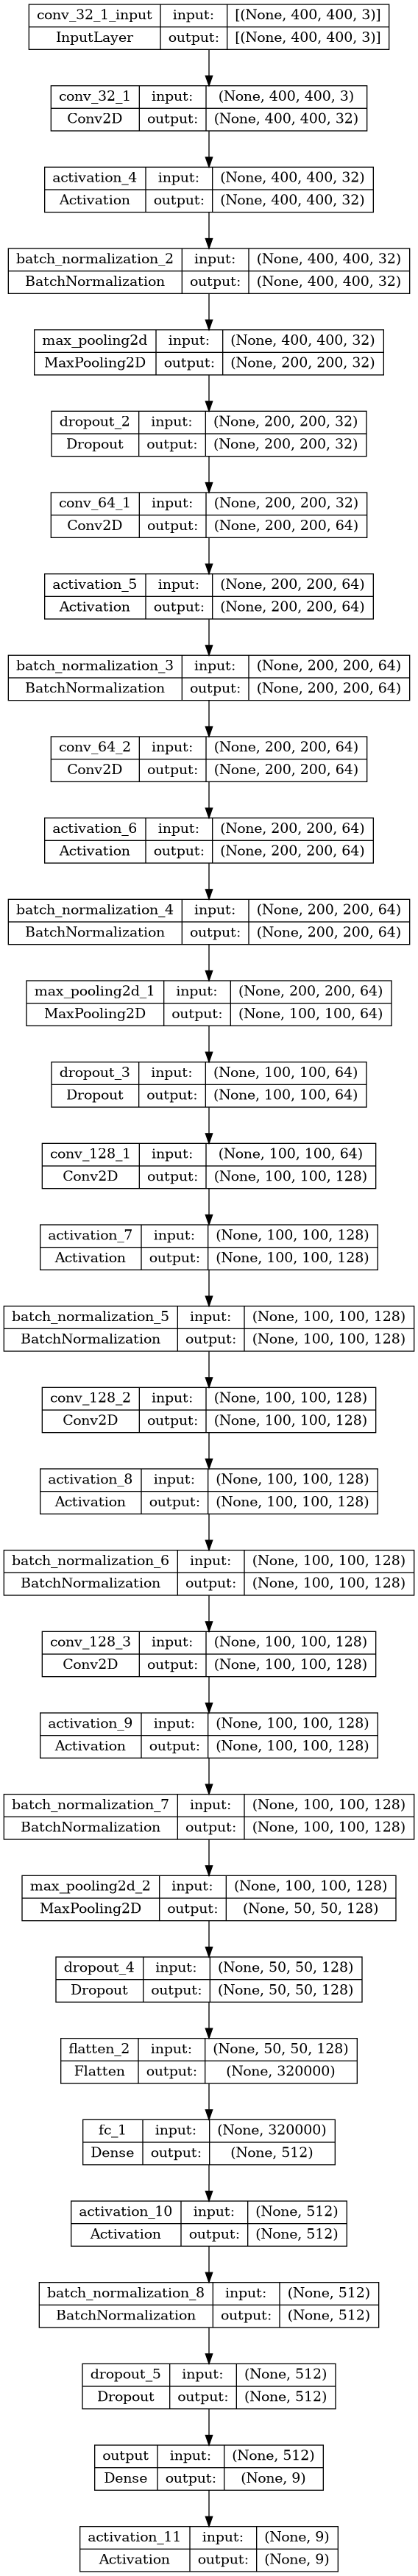

In [65]:
#plot original mode used
from tensorflow.keras.utils import plot_model
def buildModel(inputShape: tuple, classes: int) -> Sequential:
    model = Sequential()
    height, width, depth = inputShape
    inputShape = (height, width, depth)
    chanDim = -1

    # CONV => RELU => POOL layer set              # first CONV layer has 32 filters of size 3x3
    model.add(Conv2D(32, (3, 3), padding="same", name='conv_32_1', input_shape=inputShape))
    model.add(Activation("relu"))                 # ReLU (Rectified Linear Unit) activation function
    model.add(BatchNormalization(axis=chanDim))   # normalize activations of input volume before passing to next layer
    model.add(MaxPooling2D(pool_size=(2, 2)))     # progressively reduce spatial size (width and height) of input 
    model.add(Dropout(0.25))                      # disconnecting random neurons between layers, reduce overfitting

    # (CONV => RELU) * 2 => POOL layer set          # filter dimensions remain the same (3x3)
    model.add(Conv2D(64, (3, 3), padding="same", name='conv_64_1'))   # increase total number of filters learned (from 32 to 64)
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same", name='conv_64_2'))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # (CONV => RELU) * 3 => POOL layer set
    model.add(Conv2D(128, (3, 3), padding="same", name='conv_128_1'))   # total number of filters learned by CONV layers has doubled (128)
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3, 3), padding="same", name='conv_128_2'))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3, 3), padding="same", name='conv_128_3'))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # first (and only) set of fully connected layer (FC) => RELU layers
    model.add(Flatten())
    model.add(Dense(512, name='fc_1'))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # softmax classifier
    model.add(Dense(classes, name='output'))
    model.add(Activation("softmax"))

    # return the constructed network architecture
    return model
 
cnn = buildModel((400, 400, 3), 9)

plot_model(cnn, to_file='original_cnn.png', show_shapes=True, show_layer_names=True)


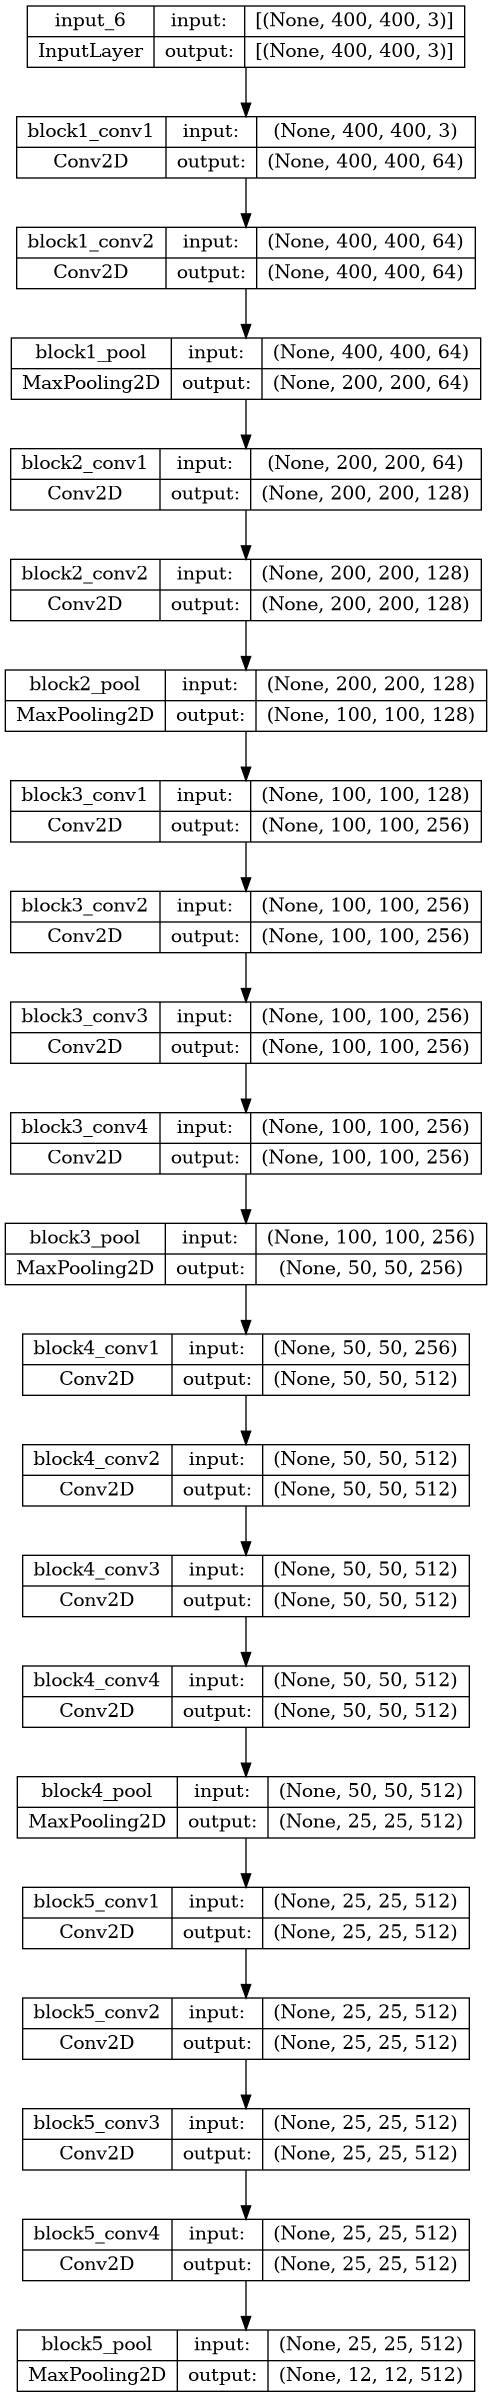

In [63]:
from tensorflow.keras.utils import plot_model
#plot vgg19 with input_shape=(400, 400, 3), include_top=False and weights='imagenet'
inputShape = (400, 400, 3)
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=inputShape)

plot_model(vgg19_base, show_shapes=True, show_layer_names=True, to_file='vgg19.png') # display using your system viewer


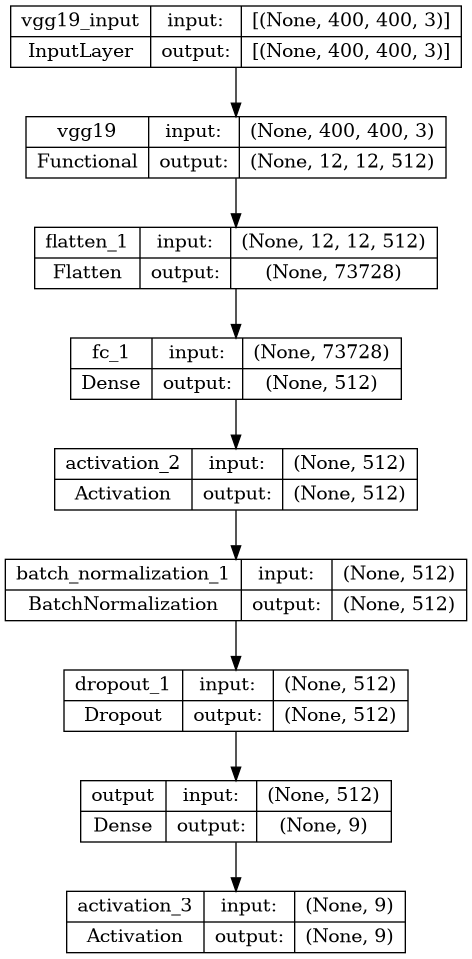

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 12, 12, 512)       20024384  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 fc_1 (Dense)                (None, 512)               37749248  
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                      

In [46]:


from PIL import ImageFont
font = None
font_path = "/usr/share/fonts/truetype/ubuntu/UbuntuMono[wght].ttf"

if os.path.isfile(font_path):
   font = ImageFont.truetype(font_path, 32)
else:
   print(f"Font file '{font_path}' not found.")

print(font)

print(font.getlength("Hello World!"))

215.0625


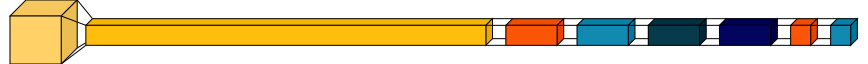

In [57]:
from tensorflow.keras import layers
from collections import defaultdict
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model,spacing=20, legend=False,color_map=color_map)